In [7]:
%matplotlib inline
from fastai.vision import *
from fastai import * # It's required to use some basic file handling (like untar_data)

In [8]:
bs = 64

In [9]:
path = untar_data(URLs.PETS)/'images'

## Data Augmentation

In [10]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                     p_affine=1., p_lighting=1.)

In [13]:
doc(ImageItemList.random_split_by_pct)

In [14]:
src = ImageItemList.from_folder(path).random_split_by_pct(0.2, seed = 2)

In [15]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
           .transform(tfms, size = size, padding_mode = padding_mode)
           .databunch(bs = bs).normalize(imagenet_stats))

In [16]:
data = get_data(224, bs, 'zeros')

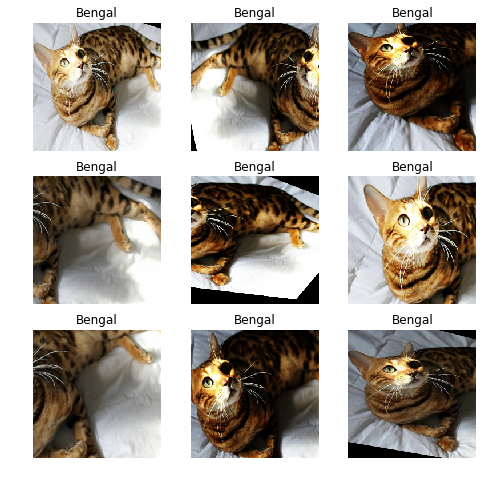

In [17]:
def _plot(i, j, ax):
    x,y = data.train_ds[4]
    x.show(ax, y = y)
    
plot_multi(_plot, 3, 3, figsize = (8,8))

In [18]:
data = get_data(224, bs)

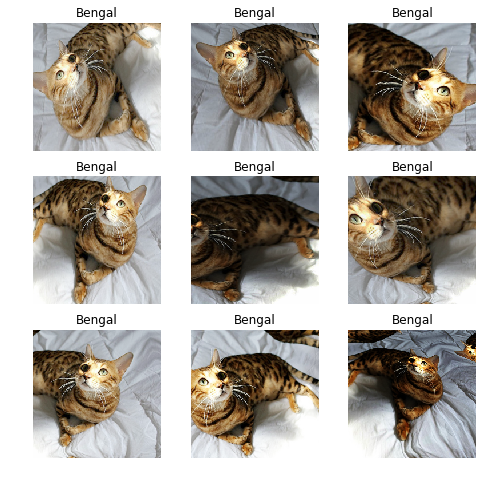

In [19]:
plot_multi(_plot, 3, 3, figsize = (8,8))

## Train a Model

In [20]:
gc.collect()
learn = create_cnn(data, models.resnet34, metrics = error_rate, bn_final=True)

In [21]:
learn.fit_one_cycle(3, slice(1e-2), pct_start = 0.8)

epoch,train_loss,valid_loss,error_rate
1,2.632629,1.436070,0.291610
2,1.574593,0.349330,0.087280
3,0.948414,0.273449,0.072395


In [22]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-3), pct_start = 0.8)

epoch,train_loss,valid_loss,error_rate
1,0.739395,0.292432,0.062923
2,0.677658,0.286699,0.058187


In [23]:
data = get_data(352, bs)
learn.data = data

In [24]:
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.648052,0.261856,0.050744
2,0.638988,0.259824,0.052097


In [25]:
learn.save('352')